In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
x, y = make_classification(n_samples = 1000, n_classes = 2, n_informative = 10, n_features = 20, random_state = 27)

In [3]:
x,y

(array([[-1.05111415,  2.21747303, -0.18671232, ...,  1.15516451,
          2.72452838, -0.44998938],
        [-0.47563435, -2.14308754, -0.13556164, ...,  0.32553708,
          1.20523982, -1.17415927],
        [-1.01201505,  0.55890546,  0.55001691, ..., -0.5582866 ,
         -3.32234854,  2.31853273],
        ...,
        [ 0.30404733,  3.97998145, -0.64424827, ..., -0.81706154,
          4.18899929,  0.12814541],
        [-0.10106285,  1.29003895, -1.29354231, ...,  1.57226614,
          3.89429749, -1.88522172],
        [ 0.34661472,  0.16906765,  0.08468245, ...,  0.4343187 ,
         -2.10760273,  1.69215995]]),
 array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
   

In [4]:
x.shape

(1000, 20)

In [5]:
y.shape

(1000,)

In [6]:
import numpy as np

In [7]:
np.unique(y)

array([0, 1])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 27)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
pred_prob = model.predict_proba(x_test)

In [12]:
pred_prob.shape

(300, 2)

In [13]:
pred_prob

array([[0.64353201, 0.35646799],
       [0.28752978, 0.71247022],
       [0.3367145 , 0.6632855 ],
       [0.41724353, 0.58275647],
       [0.09998679, 0.90001321],
       [0.01353255, 0.98646745],
       [0.48794591, 0.51205409],
       [0.96803418, 0.03196582],
       [0.14981765, 0.85018235],
       [0.57577605, 0.42422395],
       [0.04293508, 0.95706492],
       [0.37358324, 0.62641676],
       [0.0363062 , 0.9636938 ],
       [0.95286703, 0.04713297],
       [0.16482574, 0.83517426],
       [0.81108423, 0.18891577],
       [0.86096598, 0.13903402],
       [0.11277694, 0.88722306],
       [0.02146535, 0.97853465],
       [0.13430623, 0.86569377],
       [0.44432577, 0.55567423],
       [0.55356362, 0.44643638],
       [0.87192234, 0.12807766],
       [0.95625465, 0.04374535],
       [0.29595386, 0.70404614],
       [0.10726063, 0.89273937],
       [0.48013008, 0.51986992],
       [0.00930401, 0.99069599],
       [0.9415216 , 0.0584784 ],
       [0.25400533, 0.74599467],
       [0.

In [14]:
from sklearn.metrics import classification_report

In [15]:
y_pred = model.predict(x_test)

In [19]:
from collections import Counter

In [20]:
Counter(y)

Counter({1: 499, 0: 501})

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       152
           1       0.79      0.85      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [21]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label = 1)

In [23]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("AUC score = ", auc_score)

AUC score =  0.8626422475106685


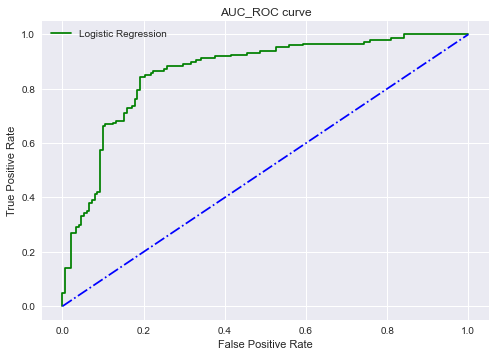

In [40]:
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle = 'solid', color = 'green', label = 'Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle = 'dashdot', color = 'blue')

plt.title('AUC_ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
plt.savefig('ROC',dpi = 300)

plt.show()